In [4]:
import zipfile
import numpy as np
import cv2

In [12]:
faces = {}
with zipfile.ZipFile("attface.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

faces

{'s1/1.pgm': array([[48, 49, 45, ..., 56, 56, 54],
        [45, 52, 39, ..., 52, 50, 51],
        [45, 50, 42, ..., 48, 53, 50],
        ...,
        [50, 48, 50, ..., 45, 46, 46],
        [45, 54, 49, ..., 46, 47, 47],
        [51, 51, 51, ..., 47, 46, 46]], dtype=uint8),
 's1/10.pgm': array([[34, 34, 33, ...,  1,  1,  1],
        [35, 30, 32, ..., 38, 47, 39],
        [34, 28, 31, ..., 55, 59, 49],
        ...,
        [30, 29, 31, ..., 35, 37, 41],
        [31, 29, 32, ..., 42, 34, 39],
        [28, 33, 27, ..., 37, 40, 33]], dtype=uint8),
 's1/2.pgm': array([[ 60,  60,  62, ...,  40,  53,  46],
        [ 58,  73,  54, ...,  34,  50,  51],
        [ 68,  77,  80, ...,  36,  50,  49],
        ...,
        [ 24, 143, 160, ...,  34,  33,  33],
        [ 18, 136, 161, ...,  36,  36,  31],
        [  9, 111, 168, ...,  32,  34,  34]], dtype=uint8),
 's1/3.pgm': array([[39, 44, 53, ..., 47, 48, 47],
        [44, 44, 61, ..., 47, 45, 46],
        [59, 39, 57, ..., 46, 46, 44],
        ...,

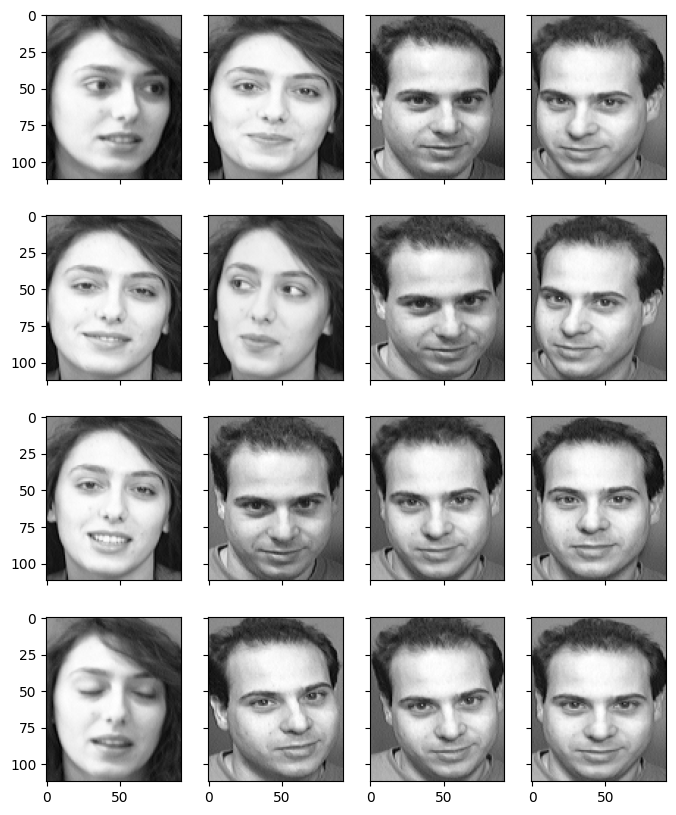

In [16]:
import matplotlib.pyplot as plt
 
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
plt.show()

In [18]:
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)

Face image shape: (112, 92)


In [19]:
print(list(faces.keys())[:5])

['s1/1.pgm', 's1/10.pgm', 's1/2.pgm', 's1/3.pgm', 's1/4.pgm']


In [21]:
classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of pictures:", len(faces))

Number of classes: 40
Number of pictures: 400


{'s1',
 's10',
 's11',
 's12',
 's13',
 's14',
 's15',
 's16',
 's17',
 's18',
 's19',
 's2',
 's20',
 's21',
 's22',
 's23',
 's24',
 's25',
 's26',
 's27',
 's28',
 's29',
 's3',
 's30',
 's31',
 's32',
 's33',
 's34',
 's35',
 's36',
 's37',
 's38',
 's39',
 's4',
 's40',
 's5',
 's6',
 's7',
 's8',
 's9'}

In [22]:
# Take classes 1-39 for eigenfaces, keep entire class 40 and
# image 10 of class 39 as out-of-sample test
facematrix = []
facelabel = []
for key,val in faces.items():
    if key.startswith("s40/"):
        continue # this is our test set
    if key == "s39/10.pgm":
        continue # this is our test set
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])
 
# Create facematrix as (n_samples,n_pixels) matrix
facematrix = np.array(facematrix)

In [23]:
# Apply PCA to extract eigenfaces
from sklearn.decomposition import PCA
 
pca = PCA().fit(facematrix)

In [24]:
print(pca.explained_variance_ratio_)

[1.77824822e-01 1.29057925e-01 6.67093882e-02 5.63561346e-02
 5.13040312e-02 3.39156477e-02 2.47893586e-02 2.27967054e-02
 1.95632067e-02 1.82678428e-02 1.45655853e-02 1.38626271e-02
 1.13318896e-02 1.07267786e-02 9.68365599e-03 9.17860717e-03
 8.60995215e-03 8.21053028e-03 7.36580634e-03 7.01112888e-03
 6.69450840e-03 6.40327943e-03 5.98295099e-03 5.49298705e-03
 5.36083980e-03 4.99408106e-03 4.84854321e-03 4.77687371e-03
 4.50099203e-03 4.35061143e-03 4.27684434e-03 4.05463914e-03
 3.96785012e-03 3.83241704e-03 3.69966355e-03 3.56356652e-03
 3.41269732e-03 3.33215240e-03 3.17642634e-03 3.03400142e-03
 2.97464206e-03 2.91054493e-03 2.86082016e-03 2.78052126e-03
 2.69873388e-03 2.60122139e-03 2.56106677e-03 2.50435737e-03
 2.44154438e-03 2.35425118e-03 2.31772334e-03 2.20335201e-03
 2.18249599e-03 2.16369451e-03 2.11113501e-03 2.05410950e-03
 2.00521036e-03 1.97423272e-03 1.95619744e-03 1.92361114e-03
 1.88146543e-03 1.81655157e-03 1.74212750e-03 1.70581678e-03
 1.66405571e-03 1.635671

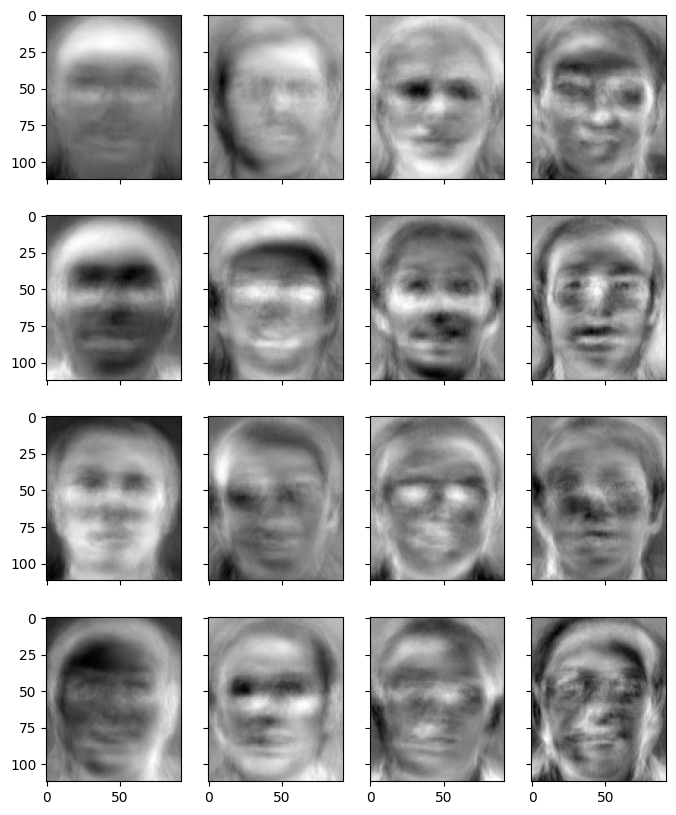

In [25]:
# Take the first K principal components as eigenfaces
n_components = 50
eigenfaces = pca.components_[:n_components]
 
# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
plt.show()